Interest rate calculator

In [54]:
import numpy as np
import numpy_financial as npf
import pandas as pd

#Variable depending on neighbor hood
real_estate_tax = 0.0200

#USA average for a person with excellent (800+) credit
mortgage_rate = 0.0320

#Amount in the savings account
down_payment = np.array(range(30000,120000,10000))

#Predicting a 30 year mortgage period
mortgage_length = 30

#The value of $110 is an USA average
home_insurance = 110

#PMI rate is on the high end 
pmi_rate = 0.0100

#HOME PRICE
home_price = 450e3

In [55]:
#Calculate monthly PMI for a mortgage payment
pmi = []
for pmt in down_payment:
    if pmt >= home_price * 0.20:
        pmi.append(0)
    else:
        pmi.append(((home_price - pmt) * pmi_rate) / 12)

pmi = np.array(pmi)


monthly_payment = -(npf.pmt(mortgage_rate/12, mortgage_length*12, home_price - down_payment)) + \
                   (home_price * real_estate_tax) / 12 + \
                    home_insurance + \
                    pmi
print(monthly_payment)

[3026.36083389 2974.78081403 2923.20079418 2871.62077432 2820.04075447
 2768.46073461 2416.88071476 2373.63402824 2330.38734172]


In [56]:
pmts_df = pd.DataFrame({
    "Down_Payment": down_payment,
    "Monthly_Mortgage_Payment": monthly_payment
})

print(pmts_df)

   Down_Payment  Monthly_Mortgage_Payment
0         30000               3026.360834
1         40000               2974.780814
2         50000               2923.200794
3         60000               2871.620774
4         70000               2820.040754
5         80000               2768.460735
6         90000               2416.880715
7        100000               2373.634028
8        110000               2330.387342


-51.580019854450256
-43.24668652111677


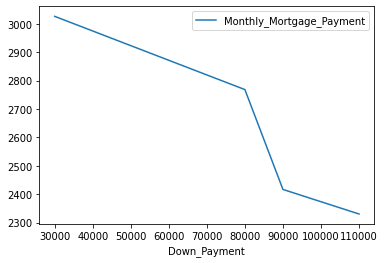

In [62]:
pmts_df.plot(x = "Down_Payment", y = "Monthly_Mortgage_Payment")

slope_1 = (monthly_payment[3] - monthly_payment[2])
slope_2 = (monthly_payment[8] - monthly_payment[7])
print(slope_1)
print(slope_2)